#### Libraries used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Monthly Churn Rate

In [2]:
# Import e_commerce dataframe
e_commerce_df1 = pd.read_csv('../datasets/e_commerce_add_revenue.csv', index_col=0)

# Import growth rates of orders 
orders_by_year_month = pd.read_csv('../datasets/growth_rates_by_year_month.csv', index_col=0)

In [3]:
e_commerce_df1.head()

,customer_id,invoice_no,invoice_date,invoice_year_month,invoice_year,invoice_month,invoice_hour,invoice_day,stock_code,description,quantity,unit_price,revenue,country
0,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,71053,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,8,Wednesday,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom


In [4]:
orders_by_year_month.head()

,invoice_year_month,total_orders,revenue,total_active_customers,order_growth,revenue_growth,active_customer_growth
0,2010-12,26157,572713.890,885,NaN,NaN,NaN
1,2011-01,21229,569445.040,741,-0.188,-0.006,-0.163
2,2011-02,19927,447137.350,758,-0.061,-0.215,0.023
3,2011-03,27175,595500.760,974,0.364,0.332,0.285
4,2011-04,22642,469200.361,856,-0.167,-0.212,-0.121


Taking insights and input from this [article](https://medium.com/datadriveninvestor/how-to-make-a-churn-analysis-using-data-science-bddda7c87e05), we understand that we need to manipulate our data in order to identify retained monthly users and total monthly users

For us ot be able to identify a **retained** customer, they have to have made an order on any given month and on the following month resepctively for them to be flagged as **retained**.

For example:
- customer_id = **18283** 
    - made an order in 2011-01 & in 2011-02 therefore he was retained for the month 2011-02
- customer_id = **12347**
    - made an order in 2011-04 & **not in** 2011-05 therefore he was not retained for the month 2011-05

In [5]:
# Grouping total active customers by month
monthly_active_customers = orders_by_year_month[['invoice_year_month', 'total_active_customers']]

In [6]:
monthly_active_customers.head()

,invoice_year_month,total_active_customers
0,2010-12,885
1,2011-01,741
2,2011-02,758
3,2011-03,974
4,2011-04,856


In [7]:
# Grouping all customer ids and all thier invoice dates by year_month to identify activity by month
customer_orders = e_commerce_df1.groupby(['customer_id','invoice_year_month']).count()['invoice_no'].reset_index()

In [8]:
customer_orders.head()

,customer_id,invoice_year_month,invoice_no
0,12346,2011-01,1
1,12347,2010-12,31
2,12347,2011-01,29
3,12347,2011-04,24
4,12347,2011-06,18


In [9]:
customer_orders.tail()

,customer_id,invoice_year_month,invoice_no
13049,18283,2011-10,40
13050,18283,2011-11,219
13051,18283,2011-12,50
13052,18287,2011-05,29
13053,18287,2011-10,41


In [10]:
# Customer activity gives us a 1 or 0 if a customer purchased an item on any given month
customer_activity = pd.pivot_table(customer_orders, values='invoice_no', 
                                   index='customer_id', columns = 'invoice_year_month', 
                                   aggfunc=np.count_nonzero).fillna(0).reset_index()


In [11]:
# Change data type from float to int
customer_activity.iloc[:,1:] = customer_activity.iloc[:,1:].astype(int)

In [12]:
customer_activity

invoice_year_month,customer_id,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,12346,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347,1,1,0,0,1,0,1,0,1,0,1,0,1
2,12348,1,1,0,0,1,0,0,0,0,1,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280,0,0,0,1,0,0,0,0,0,0,0,0,0
4334,18281,0,0,0,0,0,0,1,0,0,0,0,0,0
4335,18282,0,0,0,0,0,0,0,0,1,0,0,0,1
4336,18283,0,1,1,0,1,1,1,1,0,1,1,1,1


So, based on our above made assumption, we need to create a dataframe with 3 columns from our customer_activity table:
- invoice_year_month
- total_retained_customers
- total_active_customers

How?

In [13]:
# Make column names into str
col_names = []

for col in customer_activity.columns:
    col_names.append(str(col))
    
customer_activity.columns = col_names

In [14]:
col_names

['customer_id',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12']

In [15]:
# We should only take into account the first month and exclude the last month as it is not complete
col_names = col_names[1:-1]

In [16]:
col_names

['2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11']

In [17]:
# Utilise col_names in order to loop though customer_activity
# Double check if sum of each column corresponds to monthly_active_customers table

total_active_customers_1 = []
total_active_customers_2 = []

# customer_activity table
for col in range(len(col_names)):
    total_active_customers_1.append(customer_activity[col_names[col]].sum())

# monthly_active_customers table
for i in monthly_active_customers.total_active_customers:
    total_active_customers_2.append(i)

print(total_active_customers_1)
print(total_active_customers_2)

# Sum the subtraction of the two lists to make sure they add up
print(sum(list(np.array(total_active_customers_1) - np.array(total_active_customers_2))))

[885, 741, 758, 974, 856, 1056, 991, 949, 935, 1266, 1364, 1664]
[885, 741, 758, 974, 856, 1056, 991, 949, 935, 1266, 1364, 1664]
0


In [18]:
# Create lists for each column we need
invoice_year_month = []
retained_customers = []
total_active_customers = []

# Looping through customer_activity to sum up retained customers
for i in range(len(col_names)-1):
    # Month we want to look into retention
    current_month = col_names[i+1]
    # Previous month
    previous_month = col_names[i]
    invoice_year_month.append(current_month)
    retained_customers.append(customer_activity[(customer_activity[current_month]>0) &
                                                (customer_activity[previous_month]>0)][current_month].sum())
    total_active_customers.append(customer_activity[current_month].sum())
    
    

In [19]:
# Create a customer retention dataframe based on our previous for loop
customer_retention = pd.DataFrame(
    {'invoice_year_month': invoice_year_month,
     'retained_customers': retained_customers,
     'total_active_customers': total_active_customers
    })

In [20]:
customer_retention

,invoice_year_month,retained_customers,total_active_customers
0,2011-01,324,741
1,2011-02,262,758
2,2011-03,290,974
3,2011-04,304,856
4,2011-05,368,1056
5,2011-06,410,991
6,2011-07,365,949
7,2011-08,388,935
8,2011-09,425,1266
9,2011-10,489,1364


From here we are able to calculate the monthly retention rate of our customers by adding an additional column called 'retention_rate'.

In [21]:
# Retention rate is the rate at which we keep customers from the previous month
customer_retention['retention_rate'] = round(customer_retention.retained_customers / customer_retention.total_active_customers,2)

In [22]:
# Churn rate is the opposite of retention rate and therefore 1 - retention_rate
customer_retention['churn_rate'] = 1 - customer_retention.retention_rate

In [23]:
customer_retention

,invoice_year_month,retained_customers,total_active_customers,retention_rate,churn_rate
0,2011-01,324,741,0.44,0.56
1,2011-02,262,758,0.35,0.65
2,2011-03,290,974,0.30,0.70
3,2011-04,304,856,0.36,0.64
4,2011-05,368,1056,0.35,0.65
5,2011-06,410,991,0.41,0.59
6,2011-07,365,949,0.38,0.62
7,2011-08,388,935,0.41,0.59
8,2011-09,425,1266,0.34,0.66
9,2011-10,489,1364,0.36,0.64


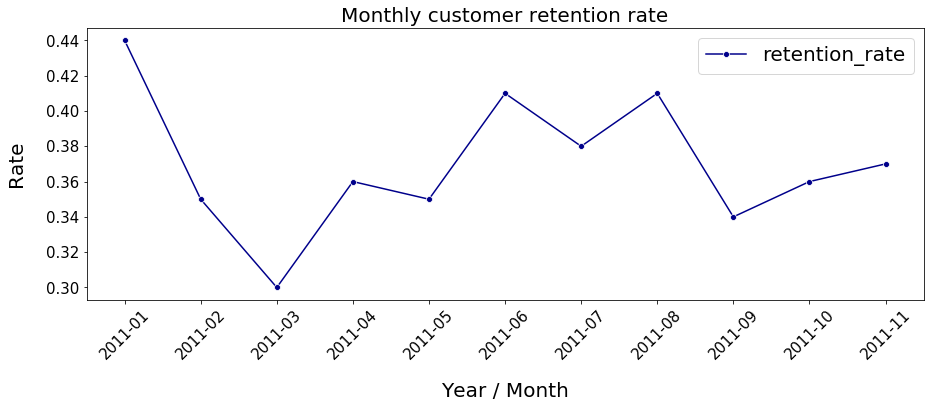

In [39]:
# Plot retention_rate by month

plt.figure(figsize=(15,5))

ax1 = sns.lineplot(x = 'invoice_year_month', y = 'retention_rate', data = customer_retention, 
                color = 'darkblue', marker="o", label = 'retention_rate')

ax1.set_xlabel("Year / Month",fontsize=20, labelpad = 20)
ax1.set_ylabel("Rate",fontsize=20, labelpad = 20)

plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Monthly customer retention rate', fontsize = 20)
plt.grid(False)
plt.legend(fontsize=20)
plt.savefig("../images/charts/monthly_customer_retention_rate.png", bbox_inches='tight', dpi=300)
plt.show()


What we can deduce that the company's monthly customer retention rates rocketd in the month of June and August. Why? 

Check resources and marketing efforts in order to narrow down the reason behind this.

# Customer cohort analysis

One of the most important analyses any customer_oriented company should consider is called *'Cohort Analaysis'*.

Cohort analysis overview:

A cohort is a group of people who share a common characteristic over a certain period of time.

In our case, our cohorts are going to be customers that purchased their first item within a given year_month i.e. we will group customers into cohorts based on their first purchase date.

Refer to this [article](https://medium.com/analytics-for-humans/a-beginners-guide-to-cohort-analysis-the-most-actionable-and-underrated-report-on-google-c0797d826bf4) for further reading


In [26]:
# Import dataframe
e_commerce_customers = pd.read_csv('../datasets/e_commerce_add_customer_types.csv', index_col=0)

In [27]:
# Rename columns
e_commerce_customers.rename(columns={'min_invoice_year_month': 'cohort_year_month'}, inplace = True)

In [28]:
# Create necessary columns for cohort dataframe
cohorts_df_columns = ['customer_id', 'invoice_no', 'invoice_date', 'invoice_year_month',
       'invoice_year', 'invoice_month', 'stock_code','quantity', 'unit_price', 'revenue', 'country',
       'min_invoice_date', 'cohort_year_month', 'user_type']


In [29]:
# Reference columns to create new dataframe
cohorts_df = e_commerce_customers[cohorts_df_columns]

In [30]:
cohorts_df['cohort_year'] = pd.to_datetime(cohorts_df['min_invoice_date']).dt.year
cohorts_df['cohort_month'] = pd.to_datetime(cohorts_df['min_invoice_date']).dt.month


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# Period is the month difference between invoice month and cohort month for each record
cohorts_df['period'] = (cohorts_df.invoice_year - cohorts_df.cohort_year) * 12 + (cohorts_df.invoice_month - cohorts_df.cohort_month) +1

## Absolute customer number cohort analysis

In [32]:
cohorts_df

,customer_id,invoice_no,invoice_date,invoice_year_month,invoice_year,invoice_month,stock_code,quantity,unit_price,revenue,country,min_invoice_date,cohort_year_month,user_type,cohort_year,cohort_month,period
0,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,85123A,6,2.55,15.30,United Kingdom,2010-12-01 08:26:00,2010-12,New,2010,12,1
1,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,71053,6,3.39,20.34,United Kingdom,2010-12-01 08:26:00,2010-12,New,2010,12,1
2,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,84406B,8,2.75,22.00,United Kingdom,2010-12-01 08:26:00,2010-12,New,2010,12,1
3,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,84029G,6,3.39,20.34,United Kingdom,2010-12-01 08:26:00,2010-12,New,2010,12,1
4,17850,536365,2010-12-01 08:26:00,2010-12,2010,12,84029E,6,3.39,20.34,United Kingdom,2010-12-01 08:26:00,2010-12,New,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397879,12713,581578,2011-12-09 12:16:00,2011-12,2011,12,22993,12,1.25,15.00,Germany,2011-12-09 12:16:00,2011-12,New,2011,12,1
397880,12713,581578,2011-12-09 12:16:00,2011-12,2011,12,22907,12,0.85,10.20,Germany,2011-12-09 12:16:00,2011-12,New,2011,12,1
397881,12713,581578,2011-12-09 12:16:00,2011-12,2011,12,22908,12,0.85,10.20,Germany,2011-12-09 12:16:00,2011-12,New,2011,12,1
397882,12713,581578,2011-12-09 12:16:00,2011-12,2011,12,23215,12,2.08,24.96,Germany,2011-12-09 12:16:00,2011-12,New,2011,12,1


In [33]:
cohort_customers_df = cohorts_df.groupby(['cohort_year_month', 'period']).nunique()['customer_id'].reset_index()

In [34]:
cohort_analysis_customers = cohort_customers_df.pivot_table(index = 'cohort_year_month', columns = 'period', values = 'customer_id')

In [35]:
cohort_analysis_customers

period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_year_month,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What does cohort_analysis_customers table tell us?

If we look at the first period (period = 1), it shows the total number of active customers on a specific cohort_year_month. Period >= 2 shows us the absolute number of remaining active customers from the intitial total for any cohort_year_month.

For example:
- cohort_year_month = **2011-02**
- period = **6**
    - retained customers is **94** our of total initial active cusomters of **380**
    - in other words, out of the customers belonging to the cohort group 2011-02, we were able to retain **~25% after 6 months**


## Retention rates cohort analysis

In [36]:
cohort_analysis_retention_rate = cohort_analysis_customers.divide(cohort_analysis_customers.iloc[:,0], axis=0)

In [37]:
cohort_analysis_retention_rate

period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_year_month,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


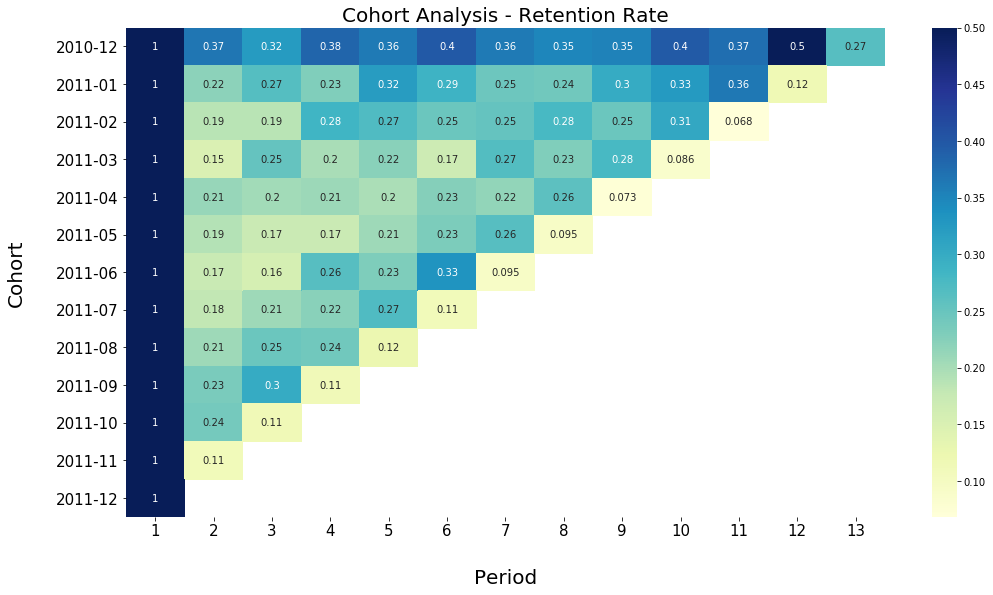

In [38]:
plt.figure(figsize = (17,9))
plt.title('Cohort Analysis - Retention Rate')
ax = sns.heatmap(data = cohort_analysis_retention_rate, 
            annot = True,
            cmap = "YlGnBu",
            vmax = 0.5
            )

ax.set_xlabel('Period',fontsize=20, labelpad = 30)
ax.set_ylabel('Cohort',fontsize=20, labelpad = 30)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Cohort Analysis - Retention Rate', fontsize = 20)
plt.grid(False)
plt.savefig("../images/charts/cohort_analysis_retention.png", bbox_inches='tight', dpi=300)
plt.show()

Approximately 50% of all customers from 2010-12 cohort return after 11 months (12 periods). This would mean that there needs to be an eye out for any changes the company might have implemented that caused such a spike in the rate.

Moreover, 2011-11 sees a sharp drop ~89% in period 2 which should be considered a red flag and must be investigated.

## Revenue cohort analysis

In [40]:
cohort_revenue_df = cohorts_df.groupby(['cohort_year_month', 'period']).mean()['revenue'].reset_index()

In [41]:
cohort_revenue_df[cohort_revenue_df.cohort_year_month=='2011-05']

,cohort_year_month,period,revenue
55,2011-05,1,20.275083
56,2011-05,2,17.140147
57,2011-05,3,22.045590
58,2011-05,4,20.896587
59,2011-05,5,18.463797
60,2011-05,6,13.996859
61,2011-05,7,16.824702
62,2011-05,8,226.613818


In [42]:
cohort_analysis_revenue = cohort_revenue_df.pivot_table(index = 'cohort_year_month', columns = 'period', values = 'revenue')

In [43]:
cohort_analysis_revenue

period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_year_month,,,,,,,,,,,,,
2010-12,21.895244,27.114025,26.642973,26.903292,21.012301,27.924305,28.072792,27.194953,29.072756,33.224203,33.671511,23.267983,25.613886
2011-01,26.556231,24.842302,20.818746,30.936646,22.370130,26.081955,25.101110,25.239483,18.993579,22.113113,19.368684,19.303297,NaN
2011-02,17.709078,20.568867,21.269069,19.264720,17.624192,16.892019,22.111490,22.792274,18.577679,21.999134,23.503814,NaN,NaN
2011-03,17.462683,21.035290,22.636071,17.959987,21.127742,18.922369,21.917451,19.844635,16.600473,12.919699,NaN,NaN,NaN
2011-04,16.859402,20.962861,19.484903,18.686756,19.291928,14.821541,15.057237,15.658102,12.141683,NaN,NaN,NaN,NaN
2011-05,20.275083,17.140147,22.045590,20.896587,18.463797,13.996859,16.824702,226.613818,NaN,NaN,NaN,NaN,NaN
2011-06,23.764522,16.022890,19.825490,20.262821,15.184188,16.452056,13.121770,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,14.825471,23.532275,11.653548,12.830022,10.756400,11.544030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,16.420856,13.101831,12.461881,15.885078,17.001513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


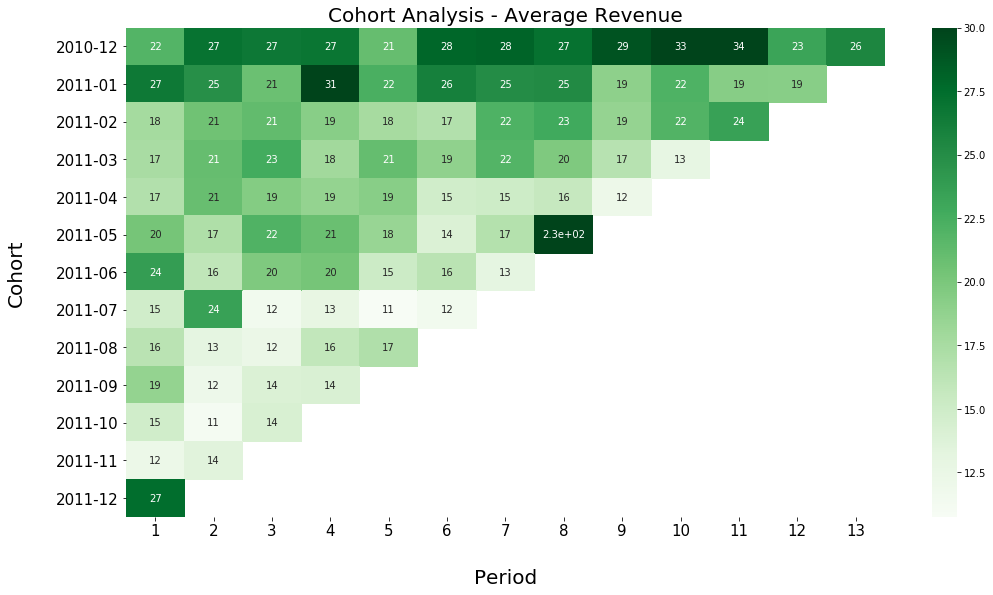

In [45]:
plt.figure(figsize = (17,9))
plt.title('Cohort Analysis - Revenue')
ax = sns.heatmap(data = cohort_analysis_revenue, 
            annot = True,
            cmap = "Greens",
            vmax = 30
            )

ax.set_xlabel('Period',fontsize=20, labelpad = 30)
ax.set_ylabel('Cohort',fontsize=20, labelpad = 30)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Cohort Analysis - Average Revenue', fontsize = 20)
plt.grid(False)
plt.savefig("../images/charts/cohort_analysis_revenue.png", bbox_inches='tight', dpi=300)
plt.show()

We can see that there is a decline in sales as the heat map moves outward to a lighter color green. Moreover, there seems to be an anamoly on cohort 2011-05 period 8 that requires further investigation. Buik buyer? One off purchase?

This type of analyses offers great insights into the performance of the company with time and can be further tweaked to allow for filtering using countries of orders, by day of the week, by hours of the day and so on.